Intro to Neural Network classification with Tensorflow

In [ ]:
#creating data to view and fit
from sklearn.datasets import make_circles

In [ ]:
#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [ ]:
#Check out the features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [ ]:
#Check out the lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#Now visualize the dataset
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


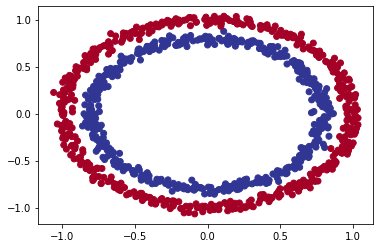

In [ ]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
#Input and Output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#Steps in modelling a classification model in tensorflow
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

#Make the model
model1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(1)
])

#Compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=tf.keras.metrics.BinaryAccuracy())

#Fit the model
model1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 4ms/step - loss: 2.8544 - binary_accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - binary_accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - binary_accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - binary_accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - binary_accuracy: 0.4830


In [ ]:
#Train for longer
model1.fit(X, y, epochs=200, verbose=0)
model1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - binary_accuracy: 0.5000


[0.6934829950332642, 0.5]

Making the model deeper


In [ ]:
#Lets make a deeper model with an extra layer
tf.random.set_seed(42)

#Make the model
model2 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])

#Compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=tf.keras.metrics.BinaryAccuracy())

#Train for longer
model2.fit(X, y, epochs=100, verbose=0)

In [ ]:
model2.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - binary_accuracy: 0.5090


[0.6980189085006714, 0.5090000033378601]

In [ ]:
#Make a plotting function to plot the decision boundary
import numpy as np

def plot_decision_boundary(model, X, y):

  #Define the axis boundaries of the plot
  x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #Create X values (We're going to make predictions on these values)
  x_in = np.c_[xx.ravel(), yy.ravel()]#Stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_in)

  #check for multi-class classfication
  if len(y_pred[0])>1 :
    print ("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else :
    print ("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing binary classification


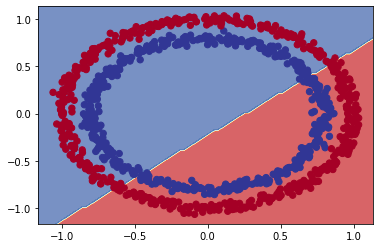

In [ ]:
#Check out teh predictions the model is making
plot_decision_boundary(model2, X, y)

In [ ]:
#Breaking down the plot_decision_boundary function

x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
#Create X values (We're going to make predictions on these values)
x_in = np.c_[xx.ravel(), yy.ravel()]

x_min, x_max, np.linspace(x_min, x_max, 100).shape, np.linspace(y_min, y_max, 100).shape, xx.shape, yy.shape, xx.ravel().shape, yy.ravel().shape, x_in.shape

(-1.1595024599098636,
 1.1337117525463374,
 (100,),
 (100,),
 (100, 100),
 (100, 100),
 (10000,),
 (10000,),
 (10000, 2))

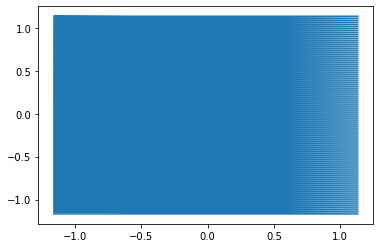

In [ ]:
plt.plot(x_in[:,0], x_in[:,1])
#Hence, we're using mesggrid here to build a carpet of inputs and then to pass them on to a model to predict the outcome. 
#Later, we plot the predictions to the same plot to visulaize the class predictions which pretty much displays the decision boundaries constructed by the underlying model 

The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. Meshgrid function is somewhat inspired from MATLAB.

Input : x = [0, 1, 2, 3, 4, 5]
        y = [2, 3, 4, 5, 6, 7, 8]

Output :
x_1 = array([[0., 1., 2., 3., 4., 5.],
             [0., 1., 2., 3., 4., 5.],
             [0., 1., 2., 3., 4., 5.],
             [0., 1., 2., 3., 4., 5.],
             [0., 1., 2., 3., 4., 5.],
             [0., 1., 2., 3., 4., 5.],
             [0., 1., 2., 3., 4., 5.]])

y_1 = array([[2., 2., 2., 2., 2., 2.],
             [3., 3., 3., 3., 3., 3.],
             [4., 4., 4., 4., 4., 4.],
             [5., 5., 5., 5., 5., 5.],
             [6., 6., 6., 6., 6., 6.],
             [7., 7., 7., 7., 7., 7.],
             [8., 8., 8., 8., 8., 8.]]

Now lets try using different activation functions (non linear)

In [ ]:
tf.random.set_seed(42)

#Make the model
model3 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#Compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=tf.keras.metrics.BinaryAccuracy())

#Train for longer
history = model3.fit(X, y, epochs=100, verbose=0)

Doing binary classification


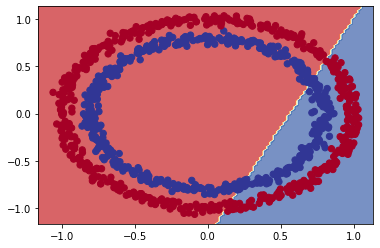

In [ ]:
plot_decision_boundary(model3, X, y)

In [ ]:
tf.random.set_seed(42)

#Make the model
model4 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#Compile the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=tf.keras.metrics.BinaryAccuracy())

#Train for longer
history = model4.fit(X, y, epochs=250, verbose=0)

In [ ]:
model4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0459 - binary_accuracy: 0.9920


[0.045933641493320465, 0.9919999837875366]

Doing binary classification


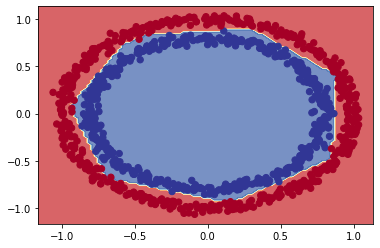

In [ ]:
plot_decision_boundary(model4, X, y)

Replicating non linear activation functions from scratch

In [ ]:
#Create a tensor (similar to the data we input to a neural network)
A = tf.cast(tf.range(-10,10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

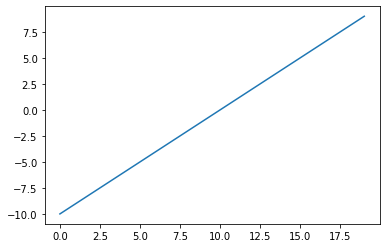

In [ ]:
#plot the points
plt.plot(A)

In [ ]:
def sigmoid(x):
  return 1/(1 + tf.math.exp(-x))

#Now transform the inout tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

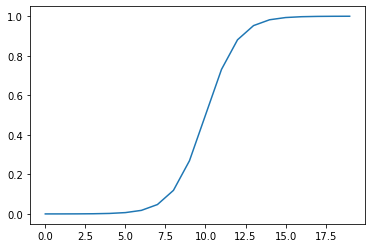

In [ ]:
#Now plot the points
plt.plot(sigmoid(A))

In [ ]:
#Now creating ReLu activation function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

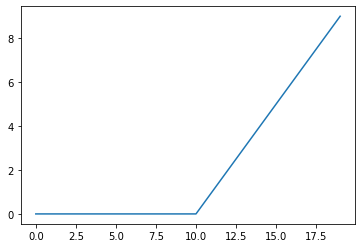

In [ ]:
plt.plot(relu(A))

In [ ]:
#Now recreating linear activation function
def linear(x):
  return x

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

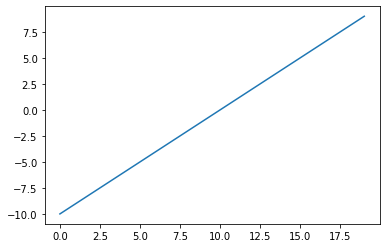

In [ ]:
plt.plot(linear(A))

Evaluating and improving the classification model


In [ ]:
#Split into train and test sets
X_train, y_train = X[:800][:], y[:800][:]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
X[999:][:]

array([[0.28105665, 0.96382443]])

In [ ]:
#Write the model
tf.random.set_seed(42)

#Make the model
model5 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#Compile the model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=tf.keras.metrics.BinaryAccuracy())

#Train for longer
history = model5.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - binary_accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6777 - binary_accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - binary_accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - binary_accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - binary_accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - binary_accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - binary_accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - binary_accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - binary_accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s

In [ ]:
#Evaluate the model on the test dataset
model5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1247 - binary_accuracy: 1.0000


[0.12468848377466202, 1.0]

Doing binary classification
Doing binary classification


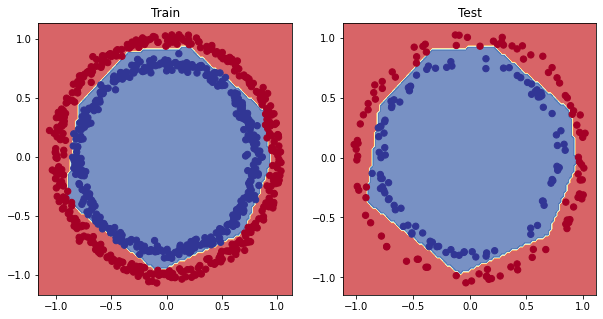

In [ ]:
#plot the decision boundary for training and test sets
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model5, X_test, y_test)
plt.show()

Text(0.5, 1.0, 'Model 5 loss and accuracy curves')

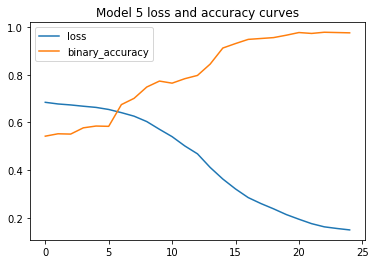

In [ ]:
#Visualizing the models history (loss curves)
pd.DataFrame(history.history).plot()
plt.title("Model 5 loss and accuracy curves")

#Now lets try to find the best/ideal learning rate

We gotta use a learning rate callback

In [ ]:
#Write the model
tf.random.set_seed(42)

#Make the model
model6 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=tf.keras.metrics.BinaryAccuracy())

#create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

#Train
history_6 = model6.fit(X_train, y_train, epochs=100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - binary_accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - binary_accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - binary_accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - binary_accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - binary_accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - binary_accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - binary_accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - binary_accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6880 - binary_accuracy: 0.5013
Epoch 10/100
25/25 [==========================

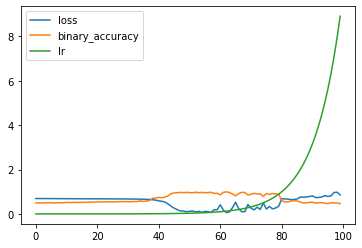

In [ ]:
pd.DataFrame(history_6.history).plot()

Text(0.5, 1.0, 'Learning rate v/s loss')

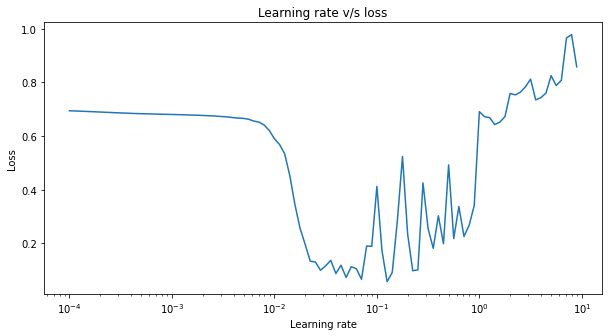

In [ ]:
#Plot the learning rate v/s the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,5))
plt.semilogx(lrs, history_6.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate v/s loss")

In [ ]:
#It is better to start out the training process with a learning rate atleast 10 times lesser than the lowest point from the above graph i.e. (10^-1). 
#Hence start off training from 10^-2. (more precisly 0.02)(to understand that, look at the log scale in the graph above)

In [ ]:
#Now build a model with the best learning rate
tf.random.set_seed(42)

#Make the model
model7 = tf.keras.models.Sequential([
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#Compile the model
model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=tf.keras.metrics.BinaryAccuracy())

#Train for longer
history_7 = model7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - binary_accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - binary_accuracy: 0.5750
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - binary_accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - binary_accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - binary_accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - binary_accuracy: 0.8313
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - binary_accuracy: 0.8450
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - binary_accuracy: 0.8875
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - binary_accuracy: 0.9100
Epoch 10/25
25/25 [==============================] - 0s

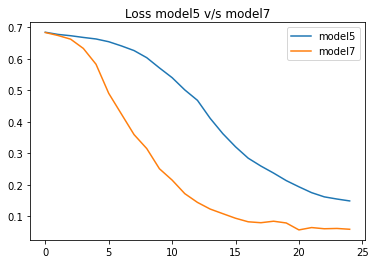

In [ ]:
#Now plot loss curves from model5 v/s model7
plt.plot(history.history['loss'], label='model5')
plt.plot(history_7.history['loss'], label='model7')
plt.title('Loss model5 v/s model7')
plt.legend()

##More classification evaluation metrices

In [ ]:
#Check the accuracy of our model
loss, accuracy = model7.evaluate(X_test, y_test)
print (f"Model loss on test set :" + str(loss))
print (f"Model accuracy on test set :" + str(accuracy*100) +"%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0463 - binary_accuracy: 0.9900
Model loss on test set :0.04628575220704079
Model accuracy on test set :99.00000095367432%


Lets plot a confusion matric now

In [ ]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_pred = model7.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test, tf.math.round(y_pred))

array([[100,   1],
       [  1,  98]])

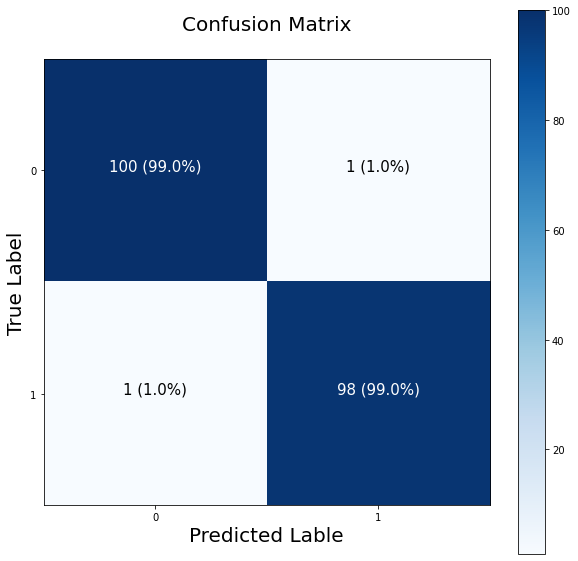

In [ ]:
#Make the confusion matrix prettier
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.math.round(y_pred))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

#Lets now pretify it
fig, ax = plt.subplots(figsize = figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes : 
  labels = classes
else : 
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title = "Confusion Matrix", 
       xlabel = "Predicted Lable",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#Set x-axis lables to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

#Adjust label sizes
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set the threshold for differen colors
threshold = (cm.max() + cm.min())/2

#Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size = 15)